References
- from https://blog.logrocket.com/deno-jupyter-notebook-data-dashboard/
- https://docs.deno.com/runtime/reference/cli/jupyter/
- See https://github.com/rgbkrk/denotebooks for more advanced examples leveraging data analysis and visualisation libraries like Polars, Observable and d3.

{
  Date: "2022-07-19",
  Income: 316,
  Expenses: 211,
  NetIncome: 105,
  BudgetIncome: 317,
  ActualIncome: 316,
  BudgetExpenses: 212,
  ActualExpenses: 211,
  Salaries: 29,
  "R&D": 48,
  Marketing: 20,
  Utilities: 35,
  Rent: 22,
  Equipment: 39,
  Software: 3,
  Hardware: 3,
  Consulting: 6,
  "Office Supplies": 6,
  DiffIncome: 1,
  DiffExpenses: 1
}


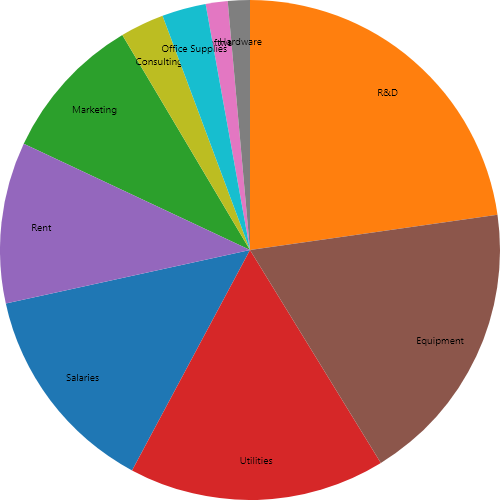

In [1]:
import pl from "npm:nodejs-polars";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

let response = await fetch(
  "https://gist.githubusercontent.com/agustinustheo/195f32a4a6c68c493056c883d959ca35/raw/c7363d8b916ab00a2d1747adb89fca120da29f42/mock_financial_data.csv",
);

let data = await response.text();

let df = pl.readCSV(data, { sep: "," });

await display(df.sample(10));

const lastDataPoint = df.tail(1).toRecords()[0];
console.log(lastDataPoint);
let categories = ['Salaries', 'R&D', 'Marketing', 'Utilities', 'Rent', 'Equipment', 'Software', 'Hardware', 'Consulting', 'Office Supplies'];

// Sample data
const sampleData1 = [];
for(let i = 0; i < categories.length; i++) {
    const category = categories[i];
    sampleData1.push({
        category,
        amount: lastDataPoint[category],
    });
}
const width = 500;
const height = 500;
const radius = Math.min(width, height) / 2;

// Create a pie function
const pie = d3.pie().value(d => d.amount);

// Create an arc generator for the slices
const arc = d3.arc()
    .innerRadius(0)
    .outerRadius(radius);

// Create an arc generator for the labels
const labelArc = d3.arc()
    .innerRadius(radius - 40) // Adjust to position the labels
    .outerRadius(radius - 40);

// Create the canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Translate to center the pie chart
ctx.translate(width / 2, height / 2);

// Draw the pie chart
pie(sampleData1).forEach((d, i) => {
    // Draw the slice
    ctx.beginPath();
    arc.context(ctx)(d);
    ctx.fillStyle = d3.schemeCategory10[i % 10];
    ctx.fill();

    // Draw the label
    ctx.fillStyle = "#000"; // Label color
    ctx.textAlign = "center";
    ctx.textBaseline = "middle";

    const centroid = labelArc.centroid(d);
    ctx.fillText(d.data.category, centroid[0], centroid[1]);
});

// Display the canvas
await display(canvas);

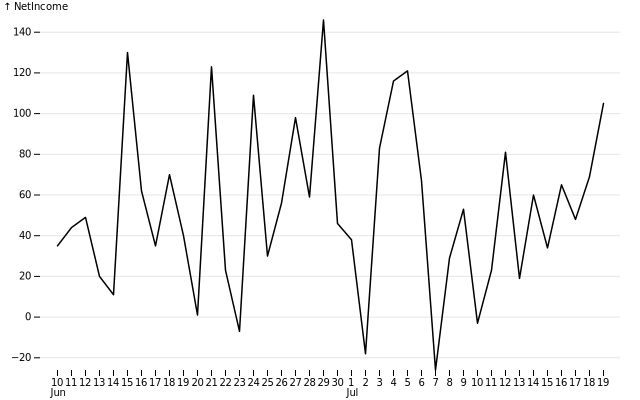

In [8]:
// Galery https://observablehq.com/@observablehq/plot-gallery

import * as Plot from "npm:@observablehq/plot";
import { DOMParser, SVGElement } from "npm:linkedom";
const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);

let records = df.tail(40).toRecords();
let convertedArray = records.map(item => {
  return {
      NetIncome: item.NetIncome,
      Date: new Date(item.Date)
  };
});

await display(
Plot.plot({
  x: { type: "band" },
  y: { grid: true },
  marks: [
    Plot.line(convertedArray, {x: "Date", y: "NetIncome"}),
  ],
  document,
}),
);

In [7]:
let sampleData2 = [];
for (let i = 0; i < records.length; i++) {
  const currentRecord = records[i];
  for (let x = 0; x < categories.length; x++) {
    const currentCategory = categories[x];
    sampleData2.push({
      date: new Date(currentRecord["Date"]),
      category: currentCategory,
      count: currentRecord[currentCategory],
    });
  }
}

await display(
  Plot.plot({
    x: { type: "band" },
    y: { grid: true },
    marks: [
      Plot.barY(sampleData2, { x: "date", y: "count", fill: "category" }),
      Plot.ruleY([0]),
    ],
    color: { legend: true },
    document,
  }),
);


Consulting Equipment Hardware Marketing Office Supplies R&D Rent Salaries Software Utilities 0 20 40 60 80 100 120 140 160 180 200 220 240 260 ↑ count 10 Jun 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 1 Jul 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [ ]:
import pl from "npm:nodejs-polars";
{
  let response = await fetch(
    "https://cdn.jsdelivr.net/npm/world-atlas@1/world/110m.tsv"
  );
  let data = await response.text();
  let df = pl.readCSV(data, { sep: "\t" });
  df
}

In [113]:
import pl from "npm:nodejs-polars";
const tsvData = `field1	field2	label
10	20	A
15	25	B
20	30	C`;
let df:pl.DataFrame = pl.readCSV(tsvData, { sep: "\t" })
df


field1,field2,label
10,20,A
15,25,B
20,30,C


In [114]:
df.describe()

describe,field1,field2,label
mean,null,25,null
std,null,5,null
min,10,20,A
max,20,30,C
median,null,25,null


In [103]:
import * as Plot from "npm:@observablehq/plot";
import { DOMParser, SVGElement } from "npm:linkedom";
import * as pl from "npm:nodejs-polars";

{
  const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);


// let response = await fetch(
//   "https://static.observableusercontent.com/files/1d0c1c541a6f8d491087e65ed28ea684092a45f64815c8835be6cfb1d9c25e417fd8ed0319e9300afa6541c7443d150f20781ec4b2adc15a0f6fd4575c958a61?response-content-disposition=attachment%3Bfilename*%3DUTF-8%27%27us-president-favorability%25402.csv",
// );

let data = await Deno.readTextFile('us-president-favorability@2.csv');
// let df = pl.readCSV(data, { sep: "," });
// // let data = await response.text();
// let response = await fetch("us-president-favorability@2.csv")
// //   "https://cdn.jsdelivr.net/npm/world-atlas@1/world/110m.tsv"
// // );
// let data = await response.text();
//let df = pl.readCSV(data, { sep: "," });
const presidents:DataFrame[] = pl.readCSV(data, { sep: "," });
const presidentsRec = presidents.toRecords()

// let records = df.tail(40).toRecords();
// let convertedArray = records.map(item => {
//   return {
//       NetIncome: item.NetIncome,
//       Date: new Date(item.Date)
//   };
// });

// await display(
// Plot.plot({
//   x: { type: "band" },
//   y: { grid: true },
//   marks: [
//     Plot.line(convertedArray, {x: "Date", y: "NetIncome"}),
//   ],
//   document,
// }),
// );
// await display(df.sample(10));
//const presidents = Plot.FileAttachment("us-president-favorability@2.csv").csv({typed: true})
await Plot.plot({
  inset: 20,
  height: 280,
  marks: [
    Plot.image(
      presidentsRec,
      Plot.dodgeY({
        x: "First Inauguration Date",
        r: 20, // clip to a circle
        preserveAspectRatio: "xMidYMin slice", // try not to clip heads
        src: "Portrait URL",
        title: "Name"
      })
    )
  ],
  document
})
//await console.table(presidentsRec)
presidents
}


Name,Very Favorable %,Somewhat Favorable %,Somewhat Unfavorable %,Very Unfavorable %,Don’t know %,Have not heard of them %,First Inauguration Date,Portrait URL
George Washington,44,26,6,4,18,3,1789-04-30,https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Gilbert_Stuart_Williamstown_Portrait_of_George_Washington.jpg/160px-Gilbert_Stuart_Williamstown_Portrait_of_George_Washington.jpg
John Adams,16,30,7,4,37,5,1797-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/John_Adams_A18236.jpg/320px-John_Adams_A18236.jpg
Thomas Jefferson,28,34,10,5,23,1,1801-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Thomas_Jefferson_by_Rembrandt_Peale%2C_1800.jpg/160px-Thomas_Jefferson_by_Rembrandt_Peale%2C_1800.jpg
James Madison,12,27,5,4,43,9,1809-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/James_Madison.jpg/160px-James_Madison.jpg
James Monroe,8,21,8,4,49,10,1817-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/James_Monroe_White_House_portrait_1819.jpg/160px-James_Monroe_White_House_portrait_1819.jpg
John Quincy Adams,13,31,5,4,41,6,1825-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/JQA_Photo.tif/lossy-page1-160px-JQA_Photo.tif.jpg
Andrew Jackson,11,23,12,17,32,5,1829-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Andrew_jackson_head.jpg/165px-Andrew_jackson_head.jpg
Martin Van Buren,3,12,10,4,54,18,1837-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Martin_Van_Buren_edit.jpg/160px-Martin_Van_Buren_edit.jpg
William Henry Harrison,3,15,9,5,55,14,1841-03-04,https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/William_Henry_Harrison_daguerreotype_edit.jpg/160px-William_Henry_Harrison_daguerreotype_edit.jpg
John Tyler,3,11,10,4,51,21,1841-04-04,https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/John_Tyler%2C_Jr.jpg/160px-John_Tyler%2C_Jr.jpg


In [33]:
//import { document } from "jsr:@ry/jupyter-helper";
import { DOMParser, SVGElement } from "npm:linkedom";
const document = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);


// Define the p5.js script inside an HTML page
const html = `
<h1 style="border: 1px solid black; padding: 10px;">
    <script src="https://cdnjs.cloudflare.com/ajax/libs/p5.js/1.9.0/p5.min.js"></script>
    <script type="text/javascript">
    try{
    console.log("start");
        new p5((sketch) => {
            sketch.setup = () => {
                sketch.createCanvas(400, 400);
                sketch.background(220);
            };

            sketch.draw = () => {
                sketch.fill(255, 0, 0);
                sketch.ellipse(sketch.mouseX, sketch.mouseY, 50, 50);
            };
        });
    console.log("end");
} catch(e) {
    console.error(e);
}
    </script>
</h1>
`;

// Embed the HTML into Jupyter
//document.documentElement.innerHTML = `<iframe srcdoc="${html}" width="420" height="420" style="border:none;"></iframe>`;
//console.log(html);
await display({"text/html": html});

In [34]:
import vl from 'npm:vega-lite-api';

await display(
    vl.markBar({ tooltip: true })
        .data([
          { a: "A", b: 28 }, { a: "B", b: 55 }, { a: "C", b: 43 },
          { a: "D", b: 91 }, { a: "E", b: 81 }, { a: "F", b: 53 },
          { a: "G", b: 19 }, { a: "H", b: 87 }, { a: "I", b: 52 },
        ])
        .encode(
          vl.x().fieldQ("b"),
          vl.y().fieldN("a"),
          vl.tooltip([vl.fieldQ("b"), vl.fieldN("a")])
        )
)


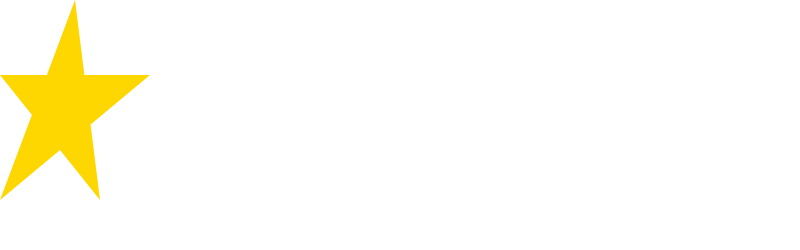

In [37]:
import {
  createCanvas,
  Path2D,
} from "https://deno.land/x/skia_canvas@0.5.8/mod.ts";

const canvasStar = createCanvas(800, 250);
const ctxStar = canvasStar.getContext("2d");

const star = new Path2D("M 75 0 L 100 200 L 0 75 L 150 75 L 0 200 Z");
ctxStar.fillStyle = "#FFD700";
ctxStar.fill(star);

await display(canvasStar);


In [38]:
import * as pl from "npm:nodejs-polars";

let df = new pl.DataFrame({
  fruit: ["Apples", "Oranges"],
  comparability: [0, 1],
});

await display(df);


fruit,comparability
Apples,0
Oranges,1


In [39]:
import { html } from "https://deno.land/x/display/mod.ts";
html`<h1>Hello Deno!</h1>`;

Hello Deno!

In [40]:
import { md } from "https://deno.land/x/display/mod.ts";
md`## Hello Deno!`;

## Hello Deno!

In [124]:
import vl from 'npm:vega-lite-api';

let plot = vl.markSquare({size: 2, opacity: 1})
  .data('https://raw.githubusercontent.com/vega/vega-datasets/main/data/zipcodes.csv')
  .transform(vl.calculate('substring(datum.zip_code, 0, 1)').as('digit'))
  .project(vl.projection('albersUsa'))
  .encode(vl.longitude().fieldQ('longitude'), vl.latitude().fieldQ('latitude'), vl.color().fieldN('digit'))
  .width(900)
  .height(Math.floor(900 / 1.75))
  .autosize({type: 'fit-x', contains: 'padding'})
  .config({view: {stroke: null}})
//console.log(plot)
await display(plot)

In [ ]:
import vl from 'npm:vega-lite-api';

const spec = {
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"category": "A", "amount": 28},
        {"category": "B", "amount": 55},
        {"category": "C", "amount": 43},
        {"category": "D", "amount": 91},
        {"category": "E", "amount": 81},
        {"category": "F", "amount": 53},
        {"category": "G", "amount": 19},
        {"category": "H", "amount": 87}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "category"},
      "range": "width",
      "padding": 0.05,
      "round": true
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "amount"},
      "nice": true,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "category"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "amount"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.category", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.amount", "offset": -2},
          "text": {"signal": "tooltip.amount"},
          "fillOpacity": [
            {"test": "isNaN(tooltip.amount)", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
}


# Tables

In [66]:
Deno.jupyter.md`https://developer.mozilla.org/en-US/docs/Web/API/console/table_static`

https://developer.mozilla.org/en-US/docs/Web/API/console/table_static

In [65]:
console.table([1, 2, 3]);
console.table([["a","b","c"],[1, 2, 3]]);
function Person(firstName, lastName) {
  this.firstName = firstName;
  this.lastName = lastName;
}

const tyrone = new Person("Tyrone", "Jones");
const janet = new Person("Janet", "Smith");
const maria = new Person("Maria", "Cruz");

console.table([tyrone, janet, maria]);


┌───────┬────────┐
│ (idx) │ Values │
├───────┼────────┤
│     0 │      1 │
│     1 │      2 │
│     2 │      3 │
└───────┴────────┘
┌───────┬─────┬─────┬─────┐
│ (idx) │ 0   │ 1   │ 2   │
├───────┼─────┼─────┼─────┤
│     0 │ "a" │ "b" │ "c" │
│     1 │ 1   │ 2   │ 3   │
└───────┴─────┴─────┴─────┘
┌───────┬───────────┬──────────┐
│ (idx) │ firstName │ lastName │
├───────┼───────────┼──────────┤
│     0 │ "Tyrone"  │ "Jones"  │
│     1 │ "Janet"   │ "Smith"  │
│     2 │ "Maria"   │ "Cruz"   │
└───────┴───────────┴──────────┘


# Imports

In [75]:
// https://nodejs.org/api/os.html
import os from "node:os";
console.log("Current architecture is:", os.arch());
console.log("Home directory is:", os.homedir());
console.log("Freemem is:", os.freemem());
console.log("Current dir:", process.cwd());


Current architecture is: x64
Home directory is: C:\Users\raiser
Freemem is: 8988258304
Current dir: d:\home\raiser\work\2025-calculator-energie


In [1]:
import * as pl from "npm:nodejs-polars"

let df = new pl.DataFrame({
    fruit: ['Apples', 'Oranges', 'Ooples & Banoonoos'],
    value: [0, 1, 0.5],
    comparability: ["<", ">", "="],
    "< 0.5": [true, false, false]
})

df

fruit,value,comparability,< 0.5
Apples,0,<,true
Oranges,1,>,false
Ooples & Banoonoos,0.5,=,false


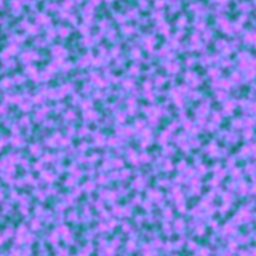

: 

In [54]:
import { createCanvas } from "https://deno.land/x/skia_canvas@0.5.8/mod.ts";
import { createNoise3D } from "https://cdn.skypack.dev/simplex-noise@4.0.0";
import { display } from "https://deno.land/x/display@v1.1.2/mod.ts";
const sleep = (t) => new Promise((r) => setTimeout(r, t));

const noise3D = createNoise3D();
const canvas = createCanvas(256, 256);
const ctx = canvas.getContext("2d");
const imageData = ctx.getImageData(0, 0, canvas.width, canvas.height);
const data2 = imageData.data;

let options = { display_id: crypto.randomUUID() };

await display(canvas, options);

for (let t = 0; t < 100; t++) {
  await sleep(60);
  for (let x = 0; x < 256; x++) {
    for (let y = 0; y < 256; y++) {
      const r = noise3D(x / 16, y / 16, t / 32) * 0.4 + 0.5;
      const g = noise3D(x / 8, y / 8, t / 32) * 0.1 + 0.5;
      const b = (r + g) * 0.9;

      data2[(x + y * 256) * 4 + 0] = r * 255;
      data2[(x + y * 256) * 4 + 1] = g * 255;
      data2[(x + y * 256) * 4 + 2] = b * 255; // Updated blue channel
      data2[(x + y * 256) * 4 + 3] = 255;
    }
  }
  ctx.putImageData(imageData, 0, 0);
  await display(canvas, { ...options, update: true });
}

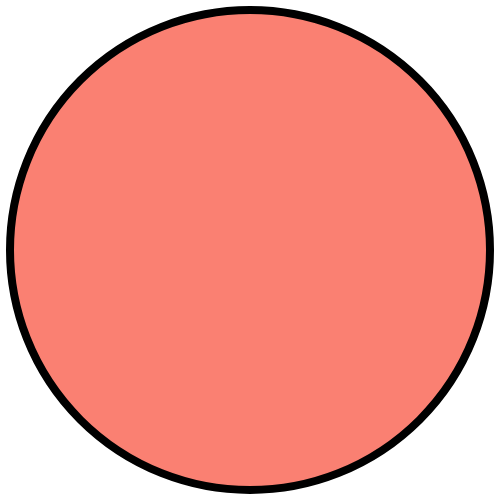

In [126]:
import { createCanvas } from "https://deno.land/x/skia_canvas@0.5.8/mod.ts";
import { display } from "https://deno.land/x/display@v1.1.2/mod.ts";

const canvas = createCanvas(500, 500);
const ctx = canvas.getContext("2d");

ctx.translate(250,250)

ctx.strokeStyle = 'black';
ctx.lineWidth = 8;

    ctx.beginPath();
    ctx.arc(0, 0, 240, 0, 2 * Math.PI);
    ctx.fillStyle = 'salmon';
    ctx.fill();
    ctx.stroke();

//console.log(canvas);
await display(canvas);

In [7]:
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
display({
  "text/markdown":
    "Get ready for **denotebooks**! ![](https://github.com/denoland.png?size=32)",
});

Get ready for **denotebooks**! ![](https://github.com/denoland.png?size=32)

In [15]:
const message_type = "display_data";
const options: DisplayOptions = null;
  // if (options.update) {
  //   message_type = "update_display_data";
  // }

await Deno.jupyter.broadcast(message_type, {
  data: {"text/html": "<h1>Hello Deno!</h1>"},
  metadata: {}, 
  transient: {display_id: options?.display_id}
});

Hello Deno!

In [16]:
await Deno.jupyter.broadcast("display_data", {
  data: { "text/html": "<b>Processing.</b>" },
  metadata: {},
  transient: { display_id: "progress" }
});

await new Promise((resolve) => setTimeout(resolve, 500));

await Deno.jupyter.broadcast("update_display_data", {
  data: { "text/html": "<b>Processing..</b>" },
  metadata: {},
  transient: { display_id: "progress" }
});

Processing..

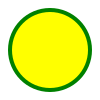

In [26]:
Deno.jupyter.svg`<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 100 100">
      <circle cx="50" cy="50" r="40" stroke="green" stroke-width="4" fill="yellow" />
    </svg>`;

In [28]:
Deno.jupyter
  .md`# Notebooks in TypeScript via Deno ![Deno logo](https://github.com/denoland.png?size=32)`

# Notebooks in TypeScript via Deno ![Deno logo](https://github.com/denoland.png?size=32)

In [29]:
Deno.jupyter.html`<h1>Hello, world!</h1>
<h2>From Deno kernel</h2>
<p>Lorem ipsum <i>dolor</i> <b>sit</b> <u>amet</u></p>`;

Hello, world! 
 From Deno kernel 
 Lorem ipsum dolor sit amet

In [31]:
await Deno.jupyter.display({
  "text/plain": "Hello, world 1!",
  "text/html": "<h1>Hello, world 2!</h1>",
  "text/markdown": "# Hello, world 3!",
}, { raw: true });

Hello, world 1!

In [38]:
import * as colors from "jsr:@std/fmt/colors";

await Deno.jupyter.display({
      "text/plain": colors.red("Hello world"),
    })
await Deno.jupyter.display({
  "text/plain": colors.red("Hello world"),
}, { raw: true });

{ "text/plain": "\x1bHello world\x1b" }

Hello world

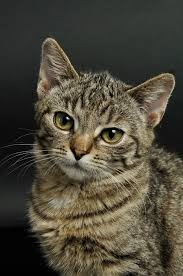

In [46]:
Deno.jupyter.image("./cat.jpg");

const data = Deno.readFileSync("./cat.jpg");
Deno.jupyter.image(data);

In [119]:
const name = prompt("What is your name?","anounymous");
Deno.jupyter.md`# Hello, ${name}!`

const conf = confirm("Are you sure you want to continue?")
Deno.jupyter.md`# Confirmed, ${conf}!`

# Confirmed, true!

In [122]:
await Deno.jupyter.display({
  "text/markdown":
    "Get ready for **denotebooks**! ![](https://github.com/denoland.png?size=32)",
}, { raw: true });
await Deno.jupyter.display({
  "text/html":
    "<h1>Get ready for <em>denotebooks</em>!</h1>salut",
}, { raw: true });


Get ready for **denotebooks**! ![](https://github.com/denoland.png?size=32)

Get ready for denotebooks ! salut

In [55]:
//import from other file
import { isEven } from "./utils.ts";

const one = isEven(1)
const two = isEven(2)

console.log(one)
console.log(two)


false
true
